### Compare fft-conv and conv-pytorch along diverse step sizes

In [1]:
import torch
from fft_conv_pytorch import fft_conv, FFTConv1d, FFTConv2d
import time
import matplotlib.pyplot as plt

In [2]:
def test_fft_conv2d(signal, kernel_size = 3, stride = 1):
    
    kernel = torch.randn(2, 3, kernel_size, kernel_size)
    bias = torch.randn(2)
    
    my_fft_conv = FFTConv2d(3, 2, kernel_size=kernel_size, stride=stride, bias=True)
    my_fft_conv.weight = torch.nn.Parameter(kernel)
    my_fft_conv.bias = torch.nn.Parameter(bias)
    
    # my_fft_conv.to(device='cuda')
    # signal.to(device='cuda')
    
    start_time = time.time()
    iters = 16
    for _ in range(iters):
        out = my_fft_conv(signal)
    end_time = time.time()
    
    return (end_time - start_time) / iters * 1000

def test_torch_conv2d(signal, kernel_size = 3, stride = 1):
    
    kernel = torch.randn(2, 3, kernel_size, kernel_size)
    bias = torch.randn(2)
    
    my_torch_conv = torch.nn.Conv2d(3, 2, kernel_size=kernel_size, stride=stride, bias=True)
    my_torch_conv.weight = torch.nn.Parameter(kernel)
    my_torch_conv.bias = torch.nn.Parameter(bias)
    
    # my_torch_conv.to(device='cuda')
    # signal.to(device='cuda')
    
    start_time = time.time()
    iters = 16
    for _ in range(iters):
        out = my_torch_conv(signal)
    end_time = time.time()
    
    return (end_time - start_time) / iters * 1000

In [3]:
signal = torch.randn(3, 3, 512, 512)
time_fftconv = []
time_torchconv = []
k = 30
for s in range(1, 20, 2):
    time_fftconv.append(test_fft_conv2d(signal=signal, kernel_size=k, stride=s))
    time_torchconv.append(test_torch_conv2d(signal=signal, kernel_size=k, stride=s))

Text(0.5, 1.0, 'conv time along different stride sizes (k=30)')

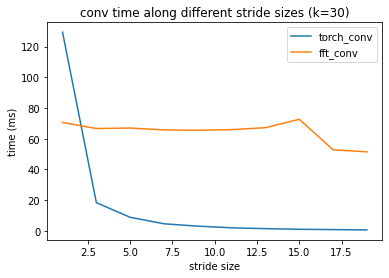

In [4]:
times = list(range(1, 20, 2))
plt.plot(times, time_torchconv, label='torch_conv')
plt.legend()
plt.plot(times, time_fftconv, label='fft_conv')
plt.legend()
plt.xlabel('stride size')
plt.ylabel('time (ms)')
plt.title('conv time along different stride sizes (k=30)')

In [5]:
signal = torch.randn(3, 3, 512, 512)
time_fftconv = []
time_torchconv = []
k = 5
for s in range(1, 20, 2):
    time_fftconv.append(test_fft_conv2d(signal=signal, kernel_size=k, stride=s))
    time_torchconv.append(test_torch_conv2d(signal=signal, kernel_size=k, stride=s))

Text(0.5, 1.0, 'conv time along different stride sizes (k=5)')

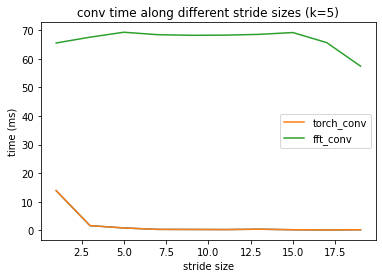

In [6]:
times = list(range(1, 20, 2))
plt.plot(times, time_torchconv)
plt.plot(times, time_torchconv, label='torch_conv')
plt.plot(times, time_fftconv, label='fft_conv')
plt.legend()
plt.xlabel('stride size')
plt.ylabel('time (ms)')
plt.title('conv time along different stride sizes (k=5)')